# Import Library

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import sys
from gensim.corpora import WikiCorpus
import warnings
warnings.filterwarnings("ignore")
import multiprocessing
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from tensorflow import keras
nltk.download('stopwords')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import re
from nltk.stem import LancasterStemmer
from tensorflow.keras.layers import TextVectorization, Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model, Sequential
from keras.layers import Dropout
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.layers.normalization.batch_normalization import BatchNormalization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Import Library yang digunakan

# Data Loading

In [2]:
data=pd.read_csv('Sentiment_Data_Indihome.csv')
data.head()

,tanggal,id,text,rt,fav,place,sent_score,sentiment
0,2022-08-23 23:42:50,1562223870467538944,hyang_wisnu kemkominfo bssn_ri platejohnny jo...,0,1,NaN,0,0
1,2022-08-23 23:41:59,1562223659535986944,hyang_wisnu data pln dan indihome bocor ini y...,16,0,NaN,-1,-1
2,2022-08-23 23:41:31,1562223542468775936,terkait kebocoran data pln dan indihome bocor ...,0,0,NaN,-2,-1
3,2022-08-23 22:58:46,1562212781600177920,mmc_idn2 26 juta data pribadi diretas negara ...,57,0,NaN,-1,-1
4,2022-08-23 22:57:33,1562212477093289984,republikaonline data pribadi pelanggan pt pln...,2,0,NaN,-2,-1


Load data tweet tentang kebocoran data indihome yang telah di scrapping menggunakan API Twitter

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tanggal     4821 non-null   object
 1   id          4821 non-null   int64 
 2   text        4821 non-null   object
 3   rt          4821 non-null   int64 
 4   fav         4821 non-null   int64 
 5   place       8 non-null      object
 6   sent_score  4821 non-null   int64 
 7   sentiment   4821 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 301.4+ KB


Info dataset dimana terdapat missing value pada fitur place

# Exploratory Data 

In [4]:
plt.style.use('fivethirtyeight')

Style yang digunakan untuk visualisasi

In [5]:
data['sentiment'].value_counts()

-1    4243
 0     528
 1      50
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

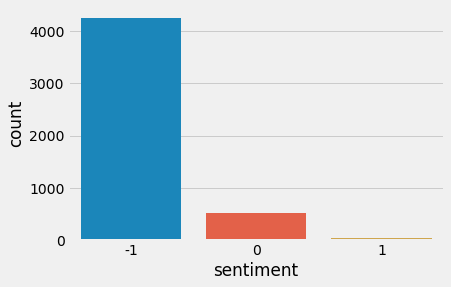

In [6]:
sns.countplot(data['sentiment'])

Kategori sentiment tweet, dimana -1 adalah Negatif, 0 Netral dan 1 Positif. Maka bisa dikatakan bahwa tema kebocoran data Indihome ini didominasi tweet sentiment negatif

In [7]:
negative = data[data['sentiment']==-1]
negative

,tanggal,id,text,rt,fav,place,sent_score,sentiment
1,2022-08-23 23:41:59,1562223659535986944,hyang_wisnu data pln dan indihome bocor ini y...,16,0,NaN,-1,-1
2,2022-08-23 23:41:31,1562223542468775936,terkait kebocoran data pln dan indihome bocor ...,0,0,NaN,-2,-1
3,2022-08-23 22:58:46,1562212781600177920,mmc_idn2 26 juta data pribadi diretas negara ...,57,0,NaN,-1,-1
4,2022-08-23 22:57:33,1562212477093289984,republikaonline data pribadi pelanggan pt pln...,2,0,NaN,-2,-1
5,2022-08-23 22:47:02,1562209829418311936,mmc_idn2 26 juta data pribadi diretas negara ...,57,0,NaN,-1,-1
...,...,...,...,...,...,...,...,...
4812,2022-08-21 03:07:44,1561188274336841984,data indihome browsing history bocor co klnqt3...,51,174,NaN,-1,-1
4813,2022-08-21 02:59:54,1561186300249574912,secgron indihome duh kok gampang banget data ...,57,880,NaN,-1,-1
4814,2022-08-21 02:59:03,1561186086088744960,yang demen buka situs k3p ketar ketir nih data...,9,13,NaN,-1,-1
4816,2022-08-21 02:43:37,1561182202943382016,myname_idontk sepe biasa data privasi berbaga...,1,0,NaN,-1,-1


Kumpulan tweet negatif

In [8]:
neutral = data[data['sentiment']==0]
neutral

,tanggal,id,text,rt,fav,place,sent_score,sentiment
0,2022-08-23 23:42:50,1562223870467538944,hyang_wisnu kemkominfo bssn_ri platejohnny jo...,0,1,NaN,0,0
21,2022-08-23 18:04:35,1562138750120907008,zarazettirazr data pelanggan indihome bocor d...,204,0,NaN,0,0
31,2022-08-23 16:17:31,1562111804032963072,terbiasa meremehkan sesuatu itu tidak baik kaw...,0,0,NaN,0,0
44,2022-08-23 14:16:18,1562081299367890944,safina2897 lagi lagi data pribadi diretas ter...,1,0,NaN,0,0
50,2022-08-23 14:03:37,1562078106881469952,kemkominfo akan segera melakukan pemanggilan ...,1,1,NaN,0,0
...,...,...,...,...,...,...,...,...
4802,2022-08-21 03:15:58,1561190346012478976,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,0
4815,2022-08-21 02:55:32,1561185201459322880,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,0
4817,2022-08-21 02:35:17,1561180106709577984,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,0
4818,2022-08-21 02:33:21,1561179619902258944,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,0


Kumpulan tweet netral

In [9]:
Positif = data[data['sentiment']==1]
Positif

,tanggal,id,text,rt,fav,place,sent_score,sentiment
43,2022-08-23 14:16:23,1562081320725265920,alhaura_18 26 juta riwayat pencarian sekaligu...,1,0,NaN,1,1
47,2022-08-23 14:05:50,1562078664300572928,infomalang menindaklanjuti berita yang sedang...,6,0,NaN,1,1
48,2022-08-23 14:04:45,1562078393834696960,kominfo akan segera mengeluarkan rekomendasi t...,0,1,NaN,1,1
49,2022-08-23 14:03:45,1562078141048241920,kominfo akan terus memperhatikan pemenuhan kew...,0,0,NaN,2,1
51,2022-08-23 14:02:52,1562077916967497984,kominfo telah menyampaikan rekomendasi teknis ...,0,1,NaN,1,1
72,2022-08-23 13:09:57,1562064601159574016,menindaklanjuti berita yang sedang hangat bela...,6,14,NaN,1,1
77,2022-08-23 12:44:25,1562058175976656896,vita_avp kemkominfo bersama pln bahkan dengan...,1,0,NaN,2,1
78,2022-08-23 12:43:16,1562057887933157120,kemkominfo bersama pln bahkan dengan melibatk...,1,2,NaN,2,1
92,2022-08-23 11:12:29,1562035041823117056,elpanjullo kementerian komunikasi dan informa...,1,0,NaN,1,1
109,2022-08-23 10:09:20,1562019148112137984,ini menunjukkan sistem pengamanan data pribad...,0,0,NaN,2,1


Kumpulan tweet positif yang hanya berjumlah 50

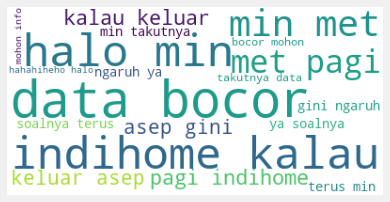

In [10]:
corpus= " ".join(data['text'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size = 10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

Wordcloud kata dari tweet topik kebocoran data indihome, dimana mayoritas isinya adalah keluhan

In [11]:
data['sentiment']=data['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'})

Mengubah sentiment -1 menjadi Negatif, 0 menjadi Netral dan 1 menjadi positif supaya lebih mudah dibaca pada saat visualisasi

<AxesSubplot:title={'center':'Analisa Sentimen Tweet Kebocoran Data Indihome'}, ylabel='sentiment'>

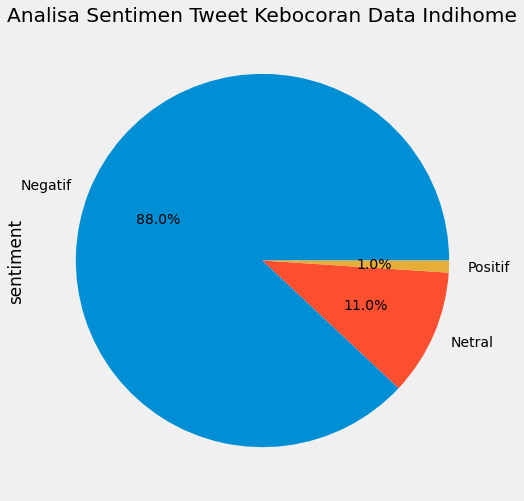

In [12]:
data['sentiment'].value_counts().plot(kind='pie',figsize=(16,8),autopct='%1.1f%%',title='Analisa Sentimen Tweet Kebocoran Data Indihome')

Persentase sentiment dimana data mayoritas diisi dari tweet negatif, ini sangat jelas karena kebocoran data adalah hal yang sangat fatal untuk sekelas perusahaan telekomunikasi BUMN

In [13]:
#Definisi list kata-kata yang berada di tweet pada masing2 kategori
netral_words=[]
positif_words=[]
negatif_words=[]

#Memasukkan kata-kata yang berada pada semua tweet untu masing-masing kategori
for txt in data['text'][data['sentiment']=='Netral']:
    for wrd in txt.split(' '):
        netral_words.append(wrd)

for txt in data['text'][data['sentiment']=='Positif']:
    for wrd in txt.split(' '):
        positif_words.append(wrd)
        
for txt in data['text'][data['sentiment']=='Negatif']:
    for wrd in txt.split(' '):
        negatif_words.append(wrd)

#mengubah list menjadi pandas Series dan menghilangkan string kosong ''
netral_wd=pd.Series(netral_words)[pd.Series(netral_words)!='']
positif_wd=pd.Series(positif_words)[pd.Series(positif_words)!='']
negatif_wd=pd.Series(negatif_words)[pd.Series(negatif_words)!='']

Membuat fungsi untuk visualsasi tweet terbanyak

<AxesSubplot:title={'center':'Top 40 Kata pada Sentimen Netral'}>

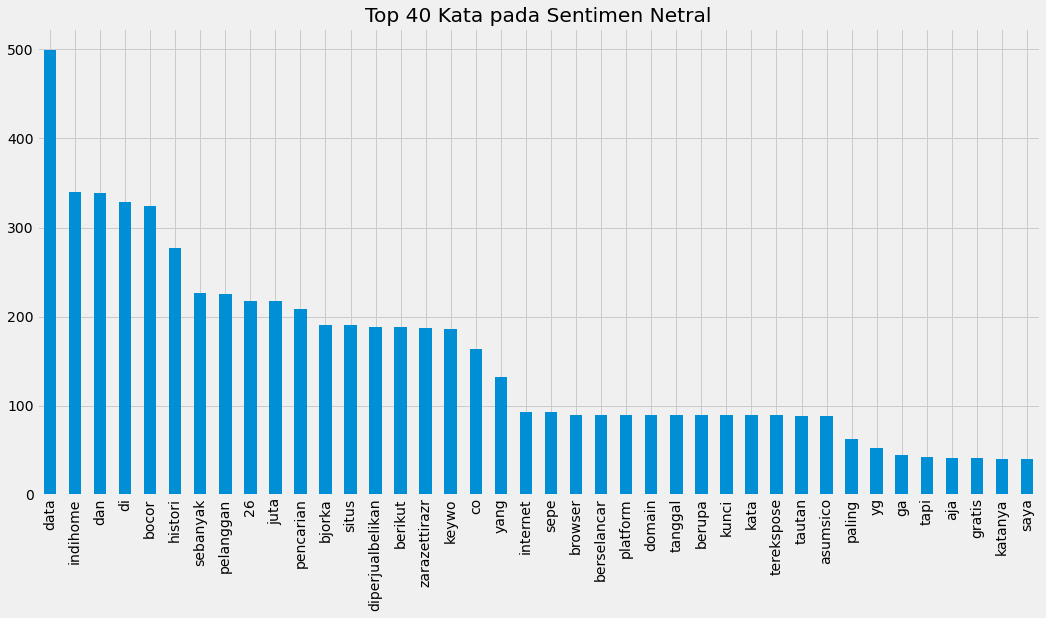

In [14]:
netral_wd.value_counts()[:40].plot(kind='bar',title='Top 40 Kata pada Sentimen Netral',figsize=(16,8))

Kata yang paling banyak muncul pada tweet netral dengan mengabaikan kata `Indihome` dan yang dan kata yang tidak mengandung arti adalah dan, di, dan sebanyak.

<AxesSubplot:title={'center':'Top 40 Kata pada Sentimen Positif'}>

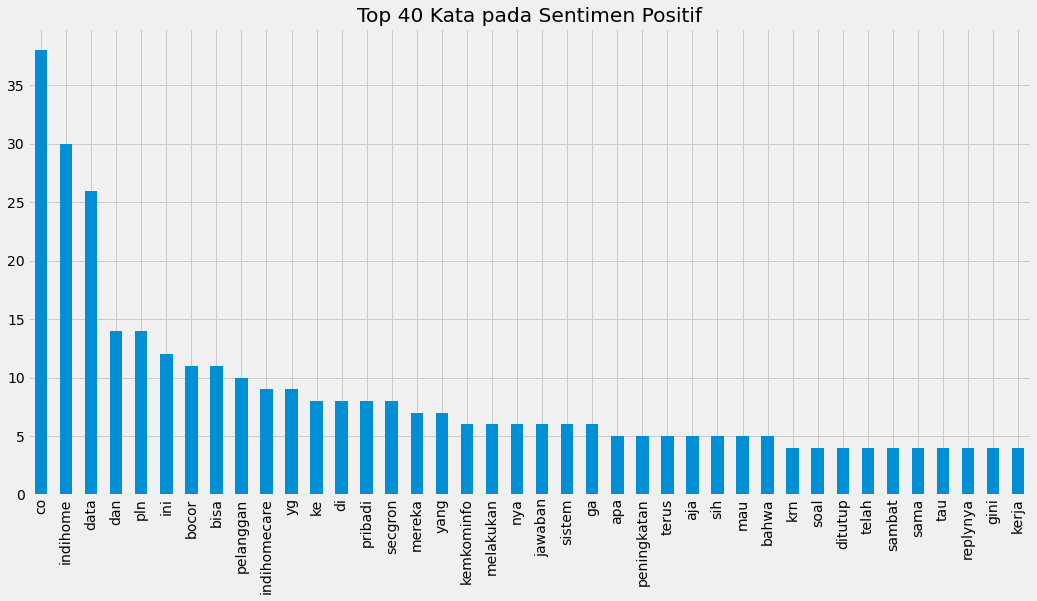

In [15]:
positif_wd.value_counts()[:40].plot(kind='bar',title='Top 40 Kata pada Sentimen Positif',figsize=(16,8))

Kata yang paling banyak muncul pada tweet positif dengan mengabaikan kata `Indihome` dan yang dan kata yang tidak mengandung arti adalah dan, pelanggan, dan pribadi.

<AxesSubplot:title={'center':'Top 40 Kata pada Sentimen Negatif'}>

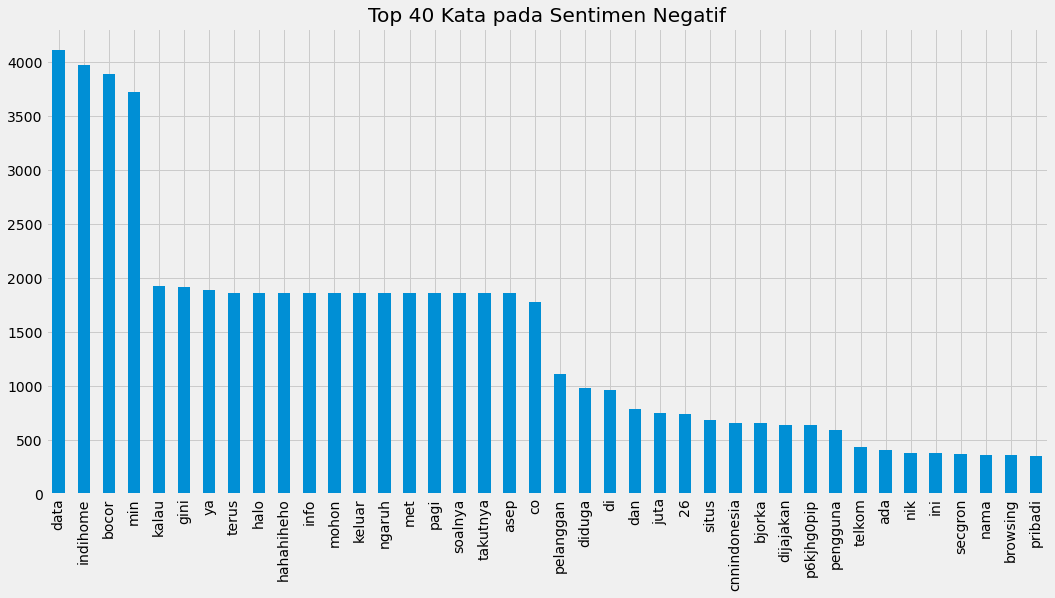

In [16]:
negatif_wd.value_counts()[:40].plot(kind='bar',title='Top 40 Kata pada Sentimen Negatif',figsize=(16,8))

Kata yang paling banyak muncul pada tweet negatif dengan mengabaikan kata `Indihome` dan yang dan kata yang tidak mengandung arti adalah bocor, kalau dan gini.

<AxesSubplot:title={'center':'Retweet'}, xlabel='sentiment'>

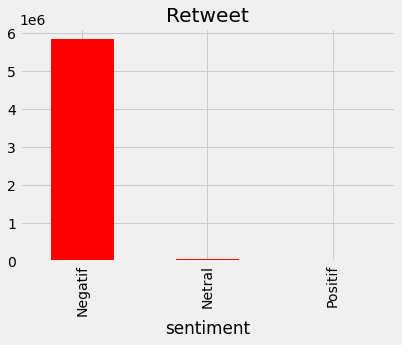

In [17]:
data.groupby('sentiment').sum()['rt'].plot(kind='bar',color='red',title='Retweet')

Sentiment terbanyak berdasarkan retweet

<AxesSubplot:title={'center':'Favorite'}, xlabel='sentiment'>

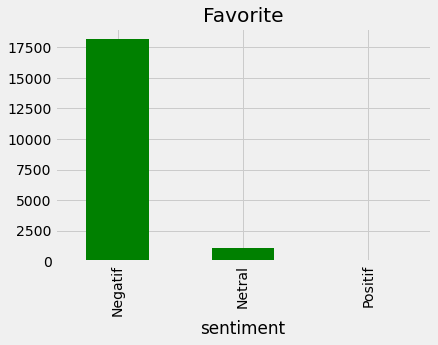

In [18]:
data.groupby('sentiment').sum()['fav'].plot(kind='bar',color='green',title='Favorite')

Sentiment terbanyak berdasarkan retweet

In [19]:
print(data[data['sentiment']=='Negatif'].sort_values(by='rt')['text'].iloc[0],end='\n\n')
print(data[data['sentiment']=='Negatif'].sort_values(by='rt')['text'].iloc[1],end='\n\n')
print(data[data['sentiment']=='Negatif'].sort_values(by='rt')['text'].iloc[2])

26 juta data pelanggan telkom indihome diduga bocor di situs co jgyqoxlnr2 co 9maxeopyhc

 secgron indihome bpjs pln indihome dulu mereka hidup damai di saat data bocor menghilang hanya kominfo yang dapat co pu8ldoiu7i

ramai isu data indihome bocor telkom itu hoaks waspada situs terlarang co njvstk1guc


Top 3 tweet sentiment negatif berdasarkan retweet

In [20]:
print(data[data['sentiment']=='Netral'].sort_values(by='rt')['text'].iloc[0],end='\n\n')
print(data[data['sentiment']=='Netral'].sort_values(by='rt')['text'].iloc[1],end='\n\n')
print(data[data['sentiment']=='Netral'].sort_values(by='rt')['text'].iloc[2])

 hyang_wisnu kemkominfo bssn_ri platejohnny jokowi _pln_id indihome aryprasetyo85 cahaya_dfa zhymme co 3sjb0qtewz

 rcchanee sebenernya iya kak tapi indihome tuh simpen data itu dgn format plain text ga dienkripsi jadi ketika co mdyknsylde

 co pjj3q9di9j


Top 3 tweet sentiment netral berdasarkan retweet

In [21]:
print(data[data['sentiment']=='Positif'].sort_values(by='rt')['text'].iloc[0],end='\n\n')
print(data[data['sentiment']=='Positif'].sort_values(by='rt')['text'].iloc[1],end='\n\n')
print(data[data['sentiment']=='Positif'].sort_values(by='rt')['text'].iloc[2])

data indihome bocor fix harus segera cari cara terus gratis 1 tahun buat pelangan yang masih stay atau mbps naik tapi harga sama 

bumn ngurusi data warganya pada becus tapi sok keras banget malu tuh terus apa pe anggung jawaban mereka co bja3s4x4ju

 indihome indihomecare ditunggu pe anggung jawaban tentang data data yang telah bocor terima kasih 


Top 3 tweet sentiment positif berdasarkan retweet

In [22]:
print(data[data['sentiment']=='Negatif'].sort_values(by='fav')['text'].iloc[0],end='\n\n')
print(data[data['sentiment']=='Negatif'].sort_values(by='fav')['text'].iloc[1],end='\n\n')
print(data[data['sentiment']=='Negatif'].sort_values(by='fav')['text'].iloc[2])

 hyang_wisnu data pln dan indihome bocor ini yang dilakukan kominfo kemkominfo akan segera mengeluarkan rekomendasi teknis untuk pen 

 hahahiheho halo min met pagi indihome kalau keluar asep gini ngaruh ya soalnya terus min takutnya data bocor mohon info 

 hahahiheho halo min met pagi indihome kalau keluar asep gini ngaruh ya soalnya terus min takutnya data bocor mohon info 


Top 3 tweet sentiment negatif berdasarkan like

# Data Preprocessing

In [23]:
tf.random.set_seed(27)
np.random.seed(27)

In [24]:
data.head()

,tanggal,id,text,rt,fav,place,sent_score,sentiment
0,2022-08-23 23:42:50,1562223870467538944,hyang_wisnu kemkominfo bssn_ri platejohnny jo...,0,1,NaN,0,Netral
1,2022-08-23 23:41:59,1562223659535986944,hyang_wisnu data pln dan indihome bocor ini y...,16,0,NaN,-1,Negatif
2,2022-08-23 23:41:31,1562223542468775936,terkait kebocoran data pln dan indihome bocor ...,0,0,NaN,-2,Negatif
3,2022-08-23 22:58:46,1562212781600177920,mmc_idn2 26 juta data pribadi diretas negara ...,57,0,NaN,-1,Negatif
4,2022-08-23 22:57:33,1562212477093289984,republikaonline data pribadi pelanggan pt pln...,2,0,NaN,-2,Negatif


## Case Folding
- Ubah teks ke lowercase
- Menghilangkan tanda baca
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan stopwords
- Stemming

In [25]:
#Ubah teks ke lowercase

teks = data.text[0]
teks_lower = teks.lower()
teks_lower

' hyang_wisnu kemkominfo bssn_ri platejohnny jokowi _pln_id indihome aryprasetyo85 cahaya_dfa zhymme co 3sjb0qtewz'

Membuat semua teks menjadi huruf kecil

In [26]:
teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_lower) #Menghilangkan mention
teks_punc = re.sub(r"\\n"," ",teks_punc) #Menghilangkan \n
teks_punc = teks_punc.strip()
teks_punc = re.sub(r"http\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub(r"www.\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub("[^A-Za-z\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
teks_punc = re.sub("rt"," ",teks_punc) #Menghilangkan RT
teks_punc

'hyang wisnu kemkominfo bssn ri platejohnny jokowi  pln id indihome aryprasetyo   cahaya dfa zhymme co  sjb qtewz'

Menggunakan RegEx untuk menghilangkan tanda baca yang tidak ada nilai sentiment seperti mention(@), hastag (#), menghilangkan link baik http - - atau pun www, menghilangkan yang bukan huruf, menghilangkan Retweet (RT) pada tweet

In [27]:
stpwds_id = list(set(stopwords.words('indonesian')))
stpwds_id.append('oh')

tokens = word_tokenize(teks_punc)

teks_stopwords = ' '.join([word for word in tokens if word not in stpwds_id])
teks_stopwords

'hyang wisnu kemkominfo bssn ri platejohnny jokowi pln id indihome aryprasetyo cahaya dfa zhymme co sjb qtewz'

Menggunakan Stopword Indonesia untuk menghapus kata-kata yang tidak memiliki makna

In [28]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

teks_stemm   = stemmer.stem(teks_stopwords)
teks_stemm

'hyang wisnu kemkominfo bssn ri platejohnny jokowi pln id indihome aryprasetyo cahaya dfa zhymme co sjb qtewz'

Menggunakan Text Stemming Sastrawi bahasa indonesia untuk menghilangkan imbuhan-imbuhan yang ada dalam teks sehingga didapatkan kata dasar

In [29]:
def text_proses(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
  teks = teks.strip()
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  teks = re.sub("rt"," ",teks) #Menghilangkan RT
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_id])
  teks = stemmer.stem(teks)
  return teks

Buat fungsi supaya bisa diterapkan pada dataframe

In [30]:
data['text_processed'] = data['text'].apply(lambda x: text_proses(x))
data

,tanggal,id,text,rt,fav,place,sent_score,sentiment,text_processed
0,2022-08-23 23:42:50,1562223870467538944,hyang_wisnu kemkominfo bssn_ri platejohnny jo...,0,1,NaN,0,Netral,hyang wisnu kemkominfo bssn ri platejohnny jok...
1,2022-08-23 23:41:59,1562223659535986944,hyang_wisnu data pln dan indihome bocor ini y...,16,0,NaN,-1,Negatif,hyang wisnu data pln indihome bocor kominfo ke...
2,2022-08-23 23:41:31,1562223542468775936,terkait kebocoran data pln dan indihome bocor ...,0,0,NaN,-2,Negatif,kait bocor data pln indihome bocor kemkominfo ...
3,2022-08-23 22:58:46,1562212781600177920,mmc_idn2 26 juta data pribadi diretas negara ...,57,0,NaN,-1,Negatif,mmc idn juta data pribadi retas negara gagal j...
4,2022-08-23 22:57:33,1562212477093289984,republikaonline data pribadi pelanggan pt pln...,2,0,NaN,-2,Negatif,republikaonline data pribadi langgan pt pln pt...
...,...,...,...,...,...,...,...,...,...
4816,2022-08-21 02:43:37,1561182202943382016,myname_idontk sepe biasa data privasi berbaga...,1,0,NaN,-1,Negatif,myname idontk sepe data privasi platform kelol...
4817,2022-08-21 02:35:17,1561180106709577984,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,Netral,tilehopper itsdioandn isp logging data browsin...
4818,2022-08-21 02:33:21,1561179619902258944,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,Netral,tilehopper itsdioandn isp logging data browsin...
4819,2022-08-21 02:16:12,1561175305338768896,itsdioandn isp logging data browsing customer...,7,20,NaN,0,Netral,itsdioandn isp logging data browsing customer ...


Menambah kolom baru text_processed adalah hasil dari text preprocessing sebelumnya

In [31]:
print(data.text[10])

 republikaonline data pribadi pelanggan pt pln dan pt telkom indihome diduga bocor co avsw4otaq8


In [32]:
print(data.text_processed[10])

republikaonline data pribadi langgan pt pln pt telkom indihome duga bocor co avsw otaq


In [33]:
data.sentiment.unique()

array(['Netral', 'Negatif', 'Positif'], dtype=object)

In [34]:
data['label'] = data['sentiment'].replace({"Negatif" : 0, "Netral" : 1, "Positif" : 2})
data

,tanggal,id,text,rt,fav,place,sent_score,sentiment,text_processed,label
0,2022-08-23 23:42:50,1562223870467538944,hyang_wisnu kemkominfo bssn_ri platejohnny jo...,0,1,NaN,0,Netral,hyang wisnu kemkominfo bssn ri platejohnny jok...,1
1,2022-08-23 23:41:59,1562223659535986944,hyang_wisnu data pln dan indihome bocor ini y...,16,0,NaN,-1,Negatif,hyang wisnu data pln indihome bocor kominfo ke...,0
2,2022-08-23 23:41:31,1562223542468775936,terkait kebocoran data pln dan indihome bocor ...,0,0,NaN,-2,Negatif,kait bocor data pln indihome bocor kemkominfo ...,0
3,2022-08-23 22:58:46,1562212781600177920,mmc_idn2 26 juta data pribadi diretas negara ...,57,0,NaN,-1,Negatif,mmc idn juta data pribadi retas negara gagal j...,0
4,2022-08-23 22:57:33,1562212477093289984,republikaonline data pribadi pelanggan pt pln...,2,0,NaN,-2,Negatif,republikaonline data pribadi langgan pt pln pt...,0
...,...,...,...,...,...,...,...,...,...,...
4816,2022-08-21 02:43:37,1561182202943382016,myname_idontk sepe biasa data privasi berbaga...,1,0,NaN,-1,Negatif,myname idontk sepe data privasi platform kelol...,0
4817,2022-08-21 02:35:17,1561180106709577984,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,Netral,tilehopper itsdioandn isp logging data browsin...,1
4818,2022-08-21 02:33:21,1561179619902258944,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,Netral,tilehopper itsdioandn isp logging data browsin...,1
4819,2022-08-21 02:16:12,1561175305338768896,itsdioandn isp logging data browsing customer...,7,20,NaN,0,Netral,itsdioandn isp logging data browsing customer ...,1


Menambah kolom baru text_processed adalah hasil dari text preprocessing sebelumnya

## Data Inference

In [35]:
data_inf = data.sample(10, random_state=30)
data_inf

,tanggal,id,text,rt,fav,place,sent_score,sentiment,text_processed,label
3163,2022-08-21 11:46:43,1561318881762746112,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0
1683,2022-08-21 20:41:50,1561453544879755008,vivacoid 26 juta data pribadi pelanggan indih...,215,0,NaN,-2,Negatif,vivacoid juta data pribadi langgan indihome du...,0
3979,2022-08-21 09:27:30,1561283846263300096,vivacoid 26 juta data pribadi pelanggan indih...,215,0,NaN,-2,Negatif,vivacoid juta data pribadi langgan indihome du...,0
1672,2022-08-21 20:59:54,1561458093908566016,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0
235,2022-08-23 03:43:00,1561921926284464128,damarjunia ramai2 menolak bocor dan melanggar...,89,0,NaN,-4,Negatif,damarjunia ramai tolak bocor langgar privasi p...,0
4134,2022-08-21 09:03:50,1561277888292593920,zarazettirazr data pelanggan indihome bocor d...,204,0,NaN,0,Netral,zarazettirazr data langgan indihome bocor dipe...,1
405,2022-08-22 22:32:52,1561843875768966912,secgron selama ini udah ketahuan mencuri brow...,295,0,NaN,-2,Negatif,secgron udah tahu curi browsing history milik ...,0
2968,2022-08-21 12:18:47,1561326949867261952,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0
2243,2022-08-21 15:02:52,1561368244249772032,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0
209,2022-08-23 04:27:48,1561933200343331072,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0


Mengambil 10 sample data inference dari dataset



In [36]:
data = data.drop(data_inf.index)
data

,tanggal,id,text,rt,fav,place,sent_score,sentiment,text_processed,label
0,2022-08-23 23:42:50,1562223870467538944,hyang_wisnu kemkominfo bssn_ri platejohnny jo...,0,1,NaN,0,Netral,hyang wisnu kemkominfo bssn ri platejohnny jok...,1
1,2022-08-23 23:41:59,1562223659535986944,hyang_wisnu data pln dan indihome bocor ini y...,16,0,NaN,-1,Negatif,hyang wisnu data pln indihome bocor kominfo ke...,0
2,2022-08-23 23:41:31,1562223542468775936,terkait kebocoran data pln dan indihome bocor ...,0,0,NaN,-2,Negatif,kait bocor data pln indihome bocor kemkominfo ...,0
3,2022-08-23 22:58:46,1562212781600177920,mmc_idn2 26 juta data pribadi diretas negara ...,57,0,NaN,-1,Negatif,mmc idn juta data pribadi retas negara gagal j...,0
4,2022-08-23 22:57:33,1562212477093289984,republikaonline data pribadi pelanggan pt pln...,2,0,NaN,-2,Negatif,republikaonline data pribadi langgan pt pln pt...,0
...,...,...,...,...,...,...,...,...,...,...
4816,2022-08-21 02:43:37,1561182202943382016,myname_idontk sepe biasa data privasi berbaga...,1,0,NaN,-1,Negatif,myname idontk sepe data privasi platform kelol...,0
4817,2022-08-21 02:35:17,1561180106709577984,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,Netral,tilehopper itsdioandn isp logging data browsin...,1
4818,2022-08-21 02:33:21,1561179619902258944,tilehopper itsdioandn isp logging data browsi...,7,0,NaN,0,Netral,tilehopper itsdioandn isp logging data browsin...,1
4819,2022-08-21 02:16:12,1561175305338768896,itsdioandn isp logging data browsing customer...,7,20,NaN,0,Netral,itsdioandn isp logging data browsing customer ...,1


Drop data inference dari data train dan sekarang data train menjadi 4881 baris

In [37]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Reset index dataset dan data inference


In [38]:
data.head()

,tanggal,id,text,rt,fav,place,sent_score,sentiment,text_processed,label
0,2022-08-23 23:42:50,1562223870467538944,hyang_wisnu kemkominfo bssn_ri platejohnny jo...,0,1,NaN,0,Netral,hyang wisnu kemkominfo bssn ri platejohnny jok...,1
1,2022-08-23 23:41:59,1562223659535986944,hyang_wisnu data pln dan indihome bocor ini y...,16,0,NaN,-1,Negatif,hyang wisnu data pln indihome bocor kominfo ke...,0
2,2022-08-23 23:41:31,1562223542468775936,terkait kebocoran data pln dan indihome bocor ...,0,0,NaN,-2,Negatif,kait bocor data pln indihome bocor kemkominfo ...,0
3,2022-08-23 22:58:46,1562212781600177920,mmc_idn2 26 juta data pribadi diretas negara ...,57,0,NaN,-1,Negatif,mmc idn juta data pribadi retas negara gagal j...,0
4,2022-08-23 22:57:33,1562212477093289984,republikaonline data pribadi pelanggan pt pln...,2,0,NaN,-2,Negatif,republikaonline data pribadi langgan pt pln pt...,0


## Split Data

In [39]:
train_data, test_data = train_test_split(data, test_size=0.15, random_state=9, stratify=data.label)
train_data, val_data = train_test_split (train_data, test_size=0.1, random_state=9, stratify=train_data.label)

Split dataset dengan data test sebesar 15%. Data train dan data validation di split sebesar 10% untuk data validation. Menggunakan stratify agar perbandingan label target tetap seimbang.

In [40]:
X_train,y_train = train_data.text_processed, train_data.label
X_val,y_val = val_data.text_processed, val_data.label
X_test,y_test = test_data.text_processed, test_data.label

Membagi data X_train, X_val dan X_test menggunakan kolom tweet sedangkan y_train, y_val dan y_test menggunakan kolom label



In [41]:
X_train

1074    secgron udah tahu curi browsing history milik ...
3531    hahahiheho halo min met pagi indihome asep gin...
4233    asumsico data ekspose histori selancar interne...
3631    hahahiheho halo min met pagi indihome asep gin...
1716    yahyasyauqi secgron poljokesid indihome kemari...
                              ...                        
332     data pribadi retas be anggungjawab nama amp no...
2951    hahahiheho halo min met pagi indihome asep gin...
3020    arsipaja data indihome browsing history bocor ...
1948    hahahiheho halo min met pagi indihome asep gin...
2702    cnnindonesia data langgan indihome duga bocor ...
Name: text_processed, Length: 3680, dtype: object

In [42]:
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

Encoding menggunakan One Hot Encoder untuk menyetarakan datanya



In [43]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<3680x2193 sparse matrix of type '<class 'numpy.int64'>'
	with 49448 stored elements in Compressed Sparse Row format>

CountVectorizer berfungsi untuk mengubah matrix menjadi sparse matrix



In [44]:
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 2193
Panjang maksimum kalimat: 23 kata


Mengecek jumlah vocab dan panjang kalimat pada data



In [45]:
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # menggunakan sequential API
                                       )

text_vectorization.adapt(X_train) #adapt seperti fit

Dilakukan Text Vectorization merubah angka menjadi vector agar bisa dibaca oleh komputer



In [46]:
data.text_processed[9]

'hyang wisnu data pln indihome bocor kominfo laku kemkominfo keluar rekomendasi teknis peningkata'

In [47]:
text_vectorization([data.text_processed[9]])

<tf.Tensor: shape=(1, 23), dtype=int64, numpy=
array([[174, 165,   2,  37,   3,   4,  35, 178,  94, 173, 159, 158, 249,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)>

Melihat kalimat yang telah dirubah menjadi vector



In [48]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

Embedding adalah memetakan kata-kata yang identik atau mirip untuk memiliki representasi yang sama atau berdekatan satu sama lain.



In [49]:
emb_res = embedding(text_vectorization([data.text_processed[9]]))
emb_res

<tf.Tensor: shape=(1, 23, 128), dtype=float32, numpy=
array([[[-0.04507166,  0.00236293, -0.00996518, ..., -0.0001161 ,
          0.00212191,  0.03451421],
        [ 0.00292325, -0.03716183,  0.00558329, ..., -0.01511109,
         -0.02421539, -0.00544887],
        [-0.02839479,  0.02126738, -0.00032688, ...,  0.02865643,
         -0.03410434,  0.01889909],
        ...,
        [ 0.00246037, -0.04997741, -0.03609344, ..., -0.01680465,
          0.04679466,  0.04456319],
        [ 0.00246037, -0.04997741, -0.03609344, ..., -0.01680465,
          0.04679466,  0.04456319],
        [ 0.00246037, -0.04997741, -0.03609344, ..., -0.01680465,
          0.04679466,  0.04456319]]], dtype=float32)>

Melihat kalimat yang telah dirubah menjadi vector



## Pipeline TensorFlow

In [50]:
#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).shuffle(4821).batch(64)


#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).batch(64)


#Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe)).batch(64)

Menggunakan Pipelien Tensforflow shufle dari jumlah dataset



# Modeling

## Model DNN

In [51]:
# arsitektur model
modeldnn= Sequential()
modeldnn.add(text_vectorization)
modeldnn.add(embedding)
modeldnn.add(GlobalAveragePooling1D())
modeldnn.add(Dense(5, activation='relu'))
modeldnn.add(Dropout(0.2))
modeldnn.add(Dense(3, activation='softmax'))

Disini saya menggunakan model DNN Sequential, menggunakakan text vectorization, embedding, GlobalAveragePooling1D, dan menggunakan 1 layer saja menggunakan 5 neuron dan activation relu

In [52]:
callbacks= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 3, verbose=1),

]

Deklarasi callbacks menggunakan EarlyStopping dengan paramater :

- monitor : vall_loss
- mode : min
- patience : 3
- verbose : 1

In [53]:
modeldnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Compile model DNN mengguanakan :

- loss : categorical_crossentropy
- optimizer : adam
- metrics : accuracy

In [54]:
modeldnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 23)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 23, 128)           280704    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

Summary yang digunakan pada model DNN



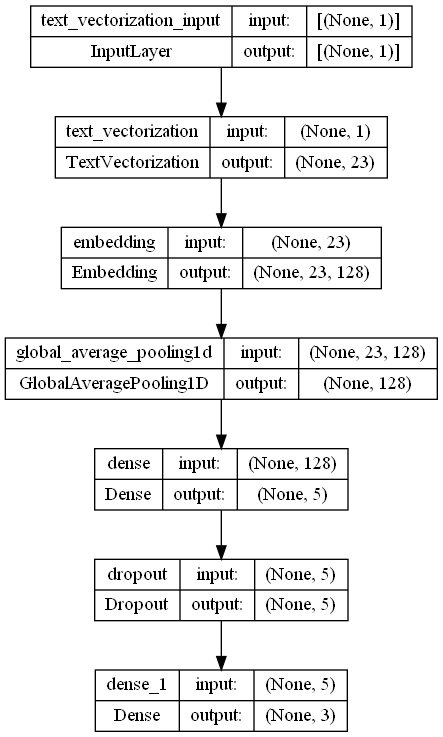

In [55]:
tf.keras.utils.plot_model(modeldnn, show_shapes=True)


Diatas adalah plot dari mmodel DNN yang dibuat



In [56]:
hist_dnn = modeldnn.fit(X_train,
                         y_train_ohe,epochs=10, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/10
115/115 [==============================] - 1s 6ms/step - loss: 0.7123 - accuracy: 0.8793 - val_loss: 0.3225 - val_accuracy: 0.8802
Epoch 2/10
115/115 [==============================] - 0s 4ms/step - loss: 0.3346 - accuracy: 0.9092 - val_loss: 0.1682 - val_accuracy: 0.9487
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.2065 - accuracy: 0.9410 - val_loss: 0.1207 - val_accuracy: 0.9633
Epoch 4/10
115/115 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9408 - val_loss: 0.1038 - val_accuracy: 0.9633
Epoch 5/10
115/115 [==============================] - 0s 4ms/step - loss: 0.1396 - accuracy: 0.9592 - val_loss: 0.0933 - val_accuracy: 0.9633
Epoch 6/10
115/115 [==============================] - 0s 4ms/step - loss: 0.1058 - accuracy: 0.9753 - val_loss: 0.0827 - val_accuracy: 0.9682
Epoch 7/10
115/115 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9788 - val_loss: 0.0793 - val_accuracy: 0.9707
Epoch 

Train model dengan 10 epochs

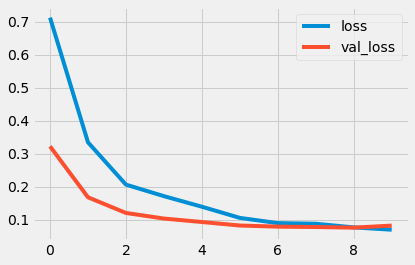

In [57]:
metrics_dnn = pd.DataFrame(hist_dnn.history)
metrics_dnn[['loss', 'val_loss']].plot();

Nilai loss dan val_loss goodfit karena memiliki gap yang sangat dekat

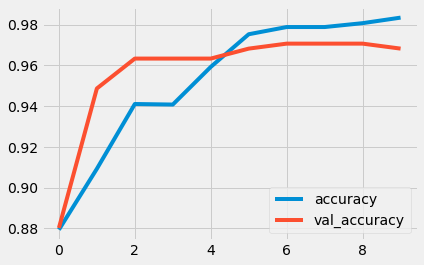

In [58]:
metrics_dnn[['accuracy', 'val_accuracy']].plot();

Nilai accuracy dan val_accuracy goodfit karena memiliki gap yang dekat

In [59]:
y_pred = modeldnn.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

23/23 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       635
           1       0.75      0.97      0.85        79
           2       0.00      0.00      0.00         8

    accuracy                           0.96       722
   macro avg       0.58      0.65      0.61       722
weighted avg       0.96      0.96      0.96       722



Model DNN memiliki akurasi sebesar 96% dan selanjutnya akan dicoba lakukan improvements model DNN

## Model LSTM

In [60]:
model_lstm = Sequential()
model_lstm.add(text_vectorization)
model_lstm.add(embedding)
model_lstm.add(LSTM(5))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax'))

Model LSTM Sequential menggunakan :
- text_vectorization
- embedding
- 1 layer
- 5 neuron LSTM
- Dropout 20%

In [61]:
model_lstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Compile model LSTM menggunakan :
- loss      : categorical_crossentropy
- optimizer : adam
- metrics   : accuracy

In [62]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 23)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 23, 128)           280704    
                                                                 
 lstm (LSTM)                 (None, 5)                 2680      
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 283,402
Trainable params: 283,402
Non-trainable params: 0
________________________________________________

model_lstm.summary()

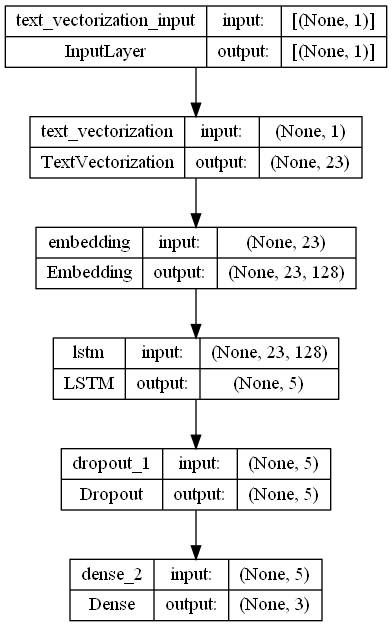

In [63]:
tf.keras.utils.plot_model(model_lstm, show_shapes=True)

Plot gambar flow model LSTM

In [64]:
hist_lstm = model_lstm.fit(X_train,
                         y_train_ohe,
                         epochs=10, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/10
115/115 [==============================] - 3s 14ms/step - loss: 0.6157 - accuracy: 0.8622 - val_loss: 0.3023 - val_accuracy: 0.9560
Epoch 2/10
115/115 [==============================] - 1s 9ms/step - loss: 0.2156 - accuracy: 0.9837 - val_loss: 0.1785 - val_accuracy: 0.9707
Epoch 3/10
115/115 [==============================] - 1s 9ms/step - loss: 0.1323 - accuracy: 0.9861 - val_loss: 0.1547 - val_accuracy: 0.9633
Epoch 4/10
115/115 [==============================] - 1s 9ms/step - loss: 0.0986 - accuracy: 0.9872 - val_loss: 0.1359 - val_accuracy: 0.9633
Epoch 5/10
115/115 [==============================] - 1s 9ms/step - loss: 0.0819 - accuracy: 0.9883 - val_loss: 0.1346 - val_accuracy: 0.9682
Epoch 6/10
115/115 [==============================] - 1s 9ms/step - loss: 0.0669 - accuracy: 0.9872 - val_loss: 0.1389 - val_accuracy: 0.9609
Epoch 7/10
115/115 [==============================] - 1s 8ms/step - loss: 0.0628 - accuracy: 0.9867 - val_loss: 0.1261 - val_accuracy: 0.9731
Epoch

Train model dengan 10 epochs, dan terstop pada 10 epoch karena memenuhi kriteria callbacks

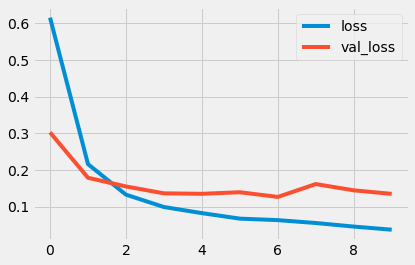

In [65]:
metrics_lstm = pd.DataFrame(hist_lstm.history)
metrics_lstm[['loss', 'val_loss']].plot();

Nilai loss dan val_loss memiliki gap yang kecil sehingga masih bisa dikatkan goodfit


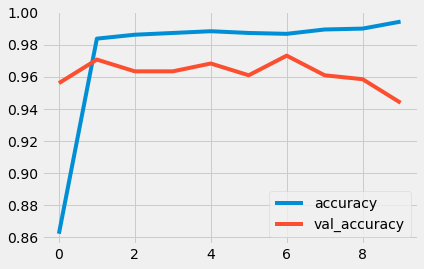

In [66]:
metrics_lstm[['accuracy', 'val_accuracy']].plot();


Nilai accuracy dan val_accuracy overfitting karena memiliki gap yang jauh

In [67]:
y_pred = model_lstm.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

23/23 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       635
           1       0.81      0.95      0.87        79
           2       0.17      0.38      0.23         8

    accuracy                           0.95       722
   macro avg       0.66      0.76      0.69       722
weighted avg       0.97      0.95      0.96       722



Nilai akurasi model LSTM 95%

## Improvements Model DNN

In [84]:
# Arsitektur model
model_dnn_imp2= Sequential()
model_dnn_imp2.add(text_vectorization)
model_dnn_imp2.add(embedding)
model_dnn_imp2.add(GlobalAveragePooling1D())
model_dnn_imp2.add(Dense(16, activation='relu'))
model_dnn_imp2.add(Dropout(0.2))
model_dnn_imp2.add(Dense(8, activation='relu'))
model_dnn_imp2.add(Dropout(0.2))
model_dnn_imp2.add(BatchNormalization())
model_dnn_imp2.add(Dense(4, activation='relu'))
model_dnn_imp2.add(Dropout(0.2))
model_dnn_imp2.add(Dense(3, activation='softmax'))

Pada model improvements DNN saya menambahkan 2 layar menjadi 3 layer, dan menambahkan BatchNormalization

In [85]:
model_dnn_imp2.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

pada model compile saya awalnya tidak ada merubah apa-apa, tapi hasilnya sangat overfit sehingga saya merubah optimizer menjadi adamax

In [88]:
model_dnn_imp2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 23)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 23, 128)           280704    
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_7 (Dense)             (None, 16)                2064      
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                

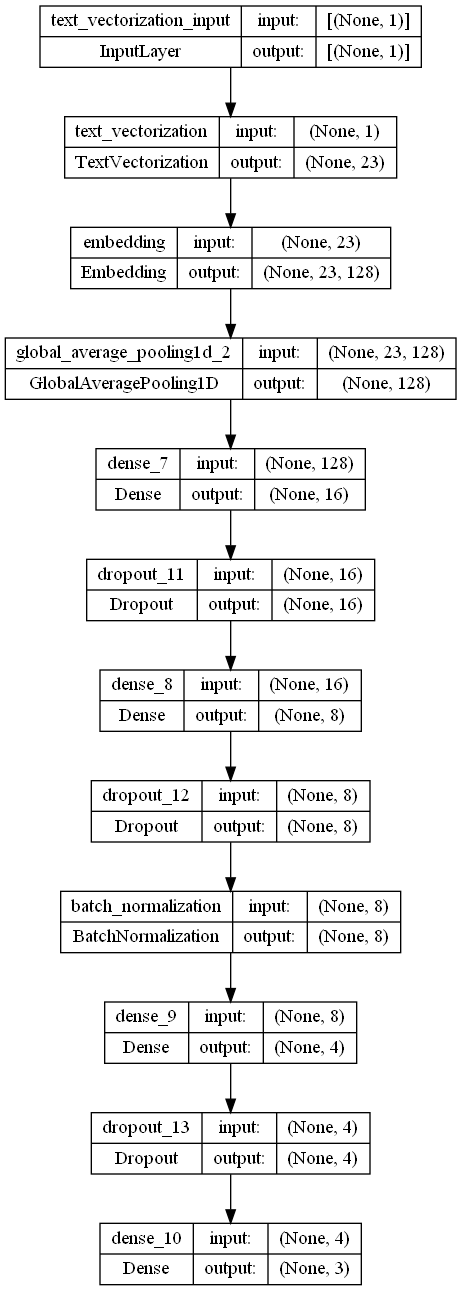

In [89]:
tf.keras.utils.plot_model(model_dnn_imp2, show_shapes=True)

In [86]:
hist_dnn_imp1 = model_dnn_imp2.fit(X_train,
                         y_train_ohe,
                         epochs=50, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
115/115 [==============================] - 1s 4ms/step - loss: 0.6534 - accuracy: 0.9163 - val_loss: 0.5832 - val_accuracy: 0.9364
Epoch 2/50
115/115 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.9326 - val_loss: 0.3001 - val_accuracy: 0.9511
Epoch 3/50
115/115 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.9424 - val_loss: 0.1819 - val_accuracy: 0.9633
Epoch 4/50
115/115 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.9541 - val_loss: 0.1247 - val_accuracy: 0.9731
Epoch 5/50
115/115 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.9524 - val_loss: 0.1000 - val_accuracy: 0.9707
Epoch 6/50
115/115 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9552 - val_loss: 0.0911 - val_accuracy: 0.9707
Epoch 7/50
115/115 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9524 - val_loss: 0.0929 - val_accuracy: 0.9707
Epoch 

Train model dengan 50 epochs, dan terstop pada 14 epoch karena memenuhi kriteria callbacks

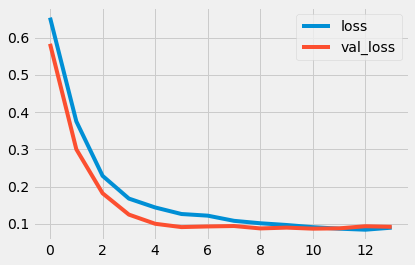

In [90]:
matrics_dnn_imp1 = pd.DataFrame(hist_dnn_imp1.history)
matrics_dnn_imp1[['loss', 'val_loss']].plot();

Nilai loss dan val_loss tetap goodfit

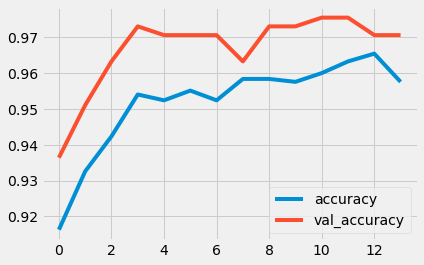

In [91]:
matrics_dnn_imp1[['accuracy', 'val_accuracy']].plot();

Tetapi nilai accuracy dan val_accuracy pada model improvements DNN masih overfitting

In [92]:
y_pred = model_dnn_imp2.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

23/23 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       635
           1       0.73      0.97      0.83        79
           2       0.00      0.00      0.00         8

    accuracy                           0.96       722
   macro avg       0.57      0.65      0.60       722
weighted avg       0.96      0.96      0.95       722



Nilai akurasi model Improvements DNN 96%

## Improvements Model LSTM

In [75]:
model_lstm2 = Sequential()
model_lstm2.add(text_vectorization)
model_lstm2.add(embedding)
model_lstm2.add(LSTM(1, return_sequences=True))
model_lstm2.add(Dropout(0.15))
model_lstm2.add(LSTM(1,return_sequences=True))
model_lstm2.add(Dropout(0.15))
model_lstm2.add(LSTM(1,return_sequences=True))
model_lstm2.add(Dropout(0.15))
model_lstm2.add(LSTM(1))
model_lstm2.add(Dropout(0.15))
model_lstm2.add(Dense(3, activation='softmax'))

Pada model improvements saya menambah 3 layer tambahan menjadi 4 layer, dan menurunkan neuron dari 5 ke 1, dan menambah dropout pada tiap layer

In [76]:
model_lstm2.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

pada compile model merubah optimizer menjadi adamax

In [77]:
model_lstm2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 23)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 23, 128)           280704    
                                                                 
 lstm_5 (LSTM)               (None, 23, 1)             520       
                                                                 
 dropout_6 (Dropout)         (None, 23, 1)             0         
                                                                 
 lstm_6 (LSTM)               (None, 23, 1)             12        
                                                                 
 dropout_7 (Dropout)         (None, 23, 1)             0         
                                                      

summary model improvements LSTM

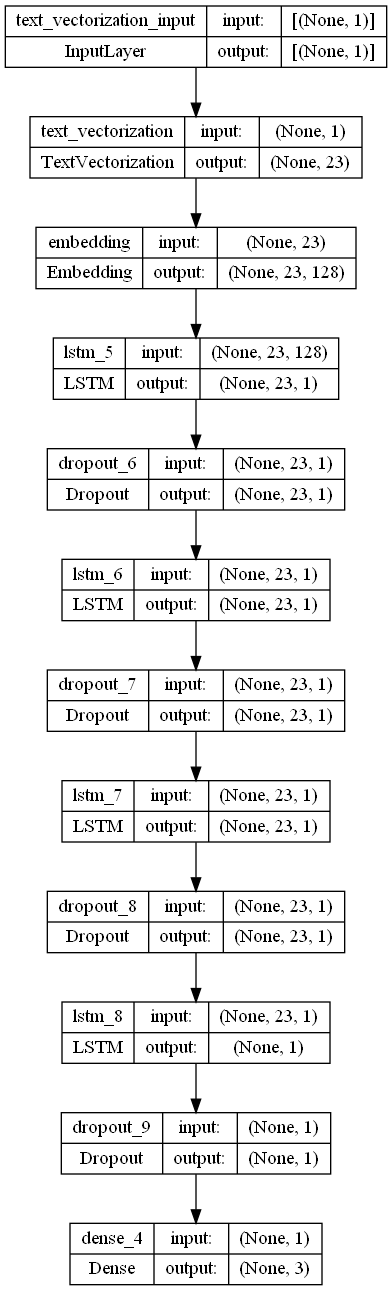

In [78]:
tf.keras.utils.plot_model(model_lstm2, show_shapes=True)

Plot dari model improvements LSTM

In [79]:
hist_50 = model_lstm2.fit(X_train,
                         y_train_ohe,
                         epochs=100, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/100
115/115 [==============================] - 8s 32ms/step - loss: 0.9981 - accuracy: 0.8802 - val_loss: 0.8901 - val_accuracy: 0.8802
Epoch 2/100
115/115 [==============================] - 3s 23ms/step - loss: 0.7794 - accuracy: 0.8802 - val_loss: 0.6558 - val_accuracy: 0.8802
Epoch 3/100
115/115 [==============================] - 3s 23ms/step - loss: 0.5846 - accuracy: 0.8802 - val_loss: 0.4939 - val_accuracy: 0.8802
Epoch 4/100
115/115 [==============================] - 3s 23ms/step - loss: 0.4656 - accuracy: 0.8802 - val_loss: 0.4075 - val_accuracy: 0.8802
Epoch 5/100
115/115 [==============================] - 3s 23ms/step - loss: 0.3910 - accuracy: 0.8802 - val_loss: 0.3458 - val_accuracy: 0.8802
Epoch 6/100
115/115 [==============================] - 3s 23ms/step - loss: 0.3440 - accuracy: 0.8802 - val_loss: 0.3008 - val_accuracy: 0.8802
Epoch 7/100
115/115 [==============================] - 3s 23ms/step - loss: 0.3046 - accuracy: 0.8834 - val_loss: 0.2653 - val_accuracy:

Train model menggunakan 50 epochs, dan terstop pada epoch ke 31 karena memenuhi kriteria callbacks

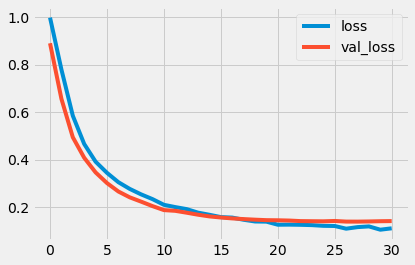

In [80]:
matrics_lstm_imp1 = pd.DataFrame(hist_50.history)
matrics_lstm_imp1[['loss', 'val_loss']].plot();

Terjadi peningkatan hasil yang sangat baik pada nilai loss dan val_loss menjadi goodfit

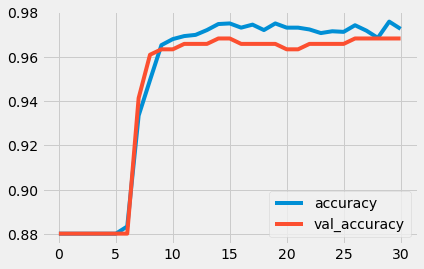

In [81]:
matrics_lstm_imp1[['accuracy', 'val_accuracy']].plot();

Nilai accuracy dan val_accuracy juga terjadi peningkatan nilai yang sangat baik menjadi goodfit

In [82]:
y_pred = model_lstm2.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

23/23 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       635
           1       0.76      0.99      0.86        79
           2       0.00      0.00      0.00         8

    accuracy                           0.96       722
   macro avg       0.59      0.65      0.61       722
weighted avg       0.96      0.96      0.96       722



Nilai akurasi juga terjadi peningkatan dari 95% menjadi 96%. Maka bisa dikatakan model Improvements LSTM ini adalah model terbaik dari model yang dijalankan, dan Model LSTM Improvements ini menjadi model yang dipilih pada penelitian ini.

## Save Model

In [94]:
model_lstm2.save('model_twitter')

INFO:tensorflow:Assets written to: model_twitter\assets


INFO:tensorflow:Assets written to: model_twitter\assets


Menyimpan model terbaik yaitu LSTM Improvements

# Data Inference

In [95]:
data_inf

,tanggal,id,text,rt,fav,place,sent_score,sentiment,text_processed,label
0,2022-08-21 11:46:43,1561318881762746112,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0
1,2022-08-21 20:41:50,1561453544879755008,vivacoid 26 juta data pribadi pelanggan indih...,215,0,NaN,-2,Negatif,vivacoid juta data pribadi langgan indihome du...,0
2,2022-08-21 09:27:30,1561283846263300096,vivacoid 26 juta data pribadi pelanggan indih...,215,0,NaN,-2,Negatif,vivacoid juta data pribadi langgan indihome du...,0
3,2022-08-21 20:59:54,1561458093908566016,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0
4,2022-08-23 03:43:00,1561921926284464128,damarjunia ramai2 menolak bocor dan melanggar...,89,0,NaN,-4,Negatif,damarjunia ramai tolak bocor langgar privasi p...,0
5,2022-08-21 09:03:50,1561277888292593920,zarazettirazr data pelanggan indihome bocor d...,204,0,NaN,0,Netral,zarazettirazr data langgan indihome bocor dipe...,1
6,2022-08-22 22:32:52,1561843875768966912,secgron selama ini udah ketahuan mencuri brow...,295,0,NaN,-2,Negatif,secgron udah tahu curi browsing history milik ...,0
7,2022-08-21 12:18:47,1561326949867261952,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0
8,2022-08-21 15:02:52,1561368244249772032,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0
9,2022-08-23 04:27:48,1561933200343331072,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0


10 data random yang diambil dari data train

In [96]:
load_model = keras.models.load_model("model_twitter")

Load model terbaik yaitu LSTM Improvements

In [97]:
y_pred_inf = load_model.predict(data_inf['text_processed'])
y_pred_inf

1/1 [==============================] - 3s 3s/step


array([[0.9954442 , 0.0025696 , 0.00198628],
       [0.99544084, 0.00257159, 0.00198749],
       [0.99544084, 0.00257159, 0.00198749],
       [0.9954442 , 0.0025696 , 0.00198628],
       [0.99544394, 0.00256975, 0.00198637],
       [0.07859017, 0.8156513 , 0.10575853],
       [0.9954397 , 0.00257236, 0.00198796],
       [0.9954442 , 0.0025696 , 0.00198628],
       [0.9954442 , 0.0025696 , 0.00198628],
       [0.9954442 , 0.0025696 , 0.00198628]], dtype=float32)

didapatkan prediksi dari hasil tweet yang sudah di text processing



In [98]:
y_pred_inf = y_pred_inf.argmax(axis=1)
y_pred_inf

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [99]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['sentiment-Prediction'])
y_pred_inf

,sentiment-Prediction
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [100]:
data_inf_concat = pd.concat([data_inf, y_pred_inf], axis=1)
data_inf_concat

,tanggal,id,text,rt,fav,place,sent_score,sentiment,text_processed,label,sentiment-Prediction
0,2022-08-21 11:46:43,1561318881762746112,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0,0
1,2022-08-21 20:41:50,1561453544879755008,vivacoid 26 juta data pribadi pelanggan indih...,215,0,NaN,-2,Negatif,vivacoid juta data pribadi langgan indihome du...,0,0
2,2022-08-21 09:27:30,1561283846263300096,vivacoid 26 juta data pribadi pelanggan indih...,215,0,NaN,-2,Negatif,vivacoid juta data pribadi langgan indihome du...,0,0
3,2022-08-21 20:59:54,1561458093908566016,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0,0
4,2022-08-23 03:43:00,1561921926284464128,damarjunia ramai2 menolak bocor dan melanggar...,89,0,NaN,-4,Negatif,damarjunia ramai tolak bocor langgar privasi p...,0,0
5,2022-08-21 09:03:50,1561277888292593920,zarazettirazr data pelanggan indihome bocor d...,204,0,NaN,0,Netral,zarazettirazr data langgan indihome bocor dipe...,1,1
6,2022-08-22 22:32:52,1561843875768966912,secgron selama ini udah ketahuan mencuri brow...,295,0,NaN,-2,Negatif,secgron udah tahu curi browsing history milik ...,0,0
7,2022-08-21 12:18:47,1561326949867261952,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0,0
8,2022-08-21 15:02:52,1561368244249772032,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0,0
9,2022-08-23 04:27:48,1561933200343331072,hahahiheho halo min met pagi indihome kalau k...,2745,0,NaN,-1,Negatif,hahahiheho halo min met pagi indihome asep gin...,0,0


# Kesimpulan

## Analisa Data
1. Indonesia topik yang dipilih adalah `Kebocoran Data Indihome` yang mana belakangan ini sedang ramai dibincangkan oleh pengguna sosial media terutama twitter yang berawal dari unggahan akun Teguh Aprianto yang menunjukan bahwa 26 juta data riwayat browsing pengguna Indihome telah bocor dan dibagikan secara gratis.
2. Tweet paling banyak bersentiment negatif dengan jumlah 4243 tweet dan hanya 50 tweet positif dari jumlah tweet 4821, ini dikarenakan topik `Kebocoran Data Indihome` cukup membuat masyarakat marah karena data history browsing yang merupakan hal privasi menjadi tersebar ke umum.
3. Berdasarkan wordcloud data yang paling banyak keluar adalah `data bocor`, `keluar`, `takutnya`, `halo min` rata-rata adalah keluhan dari pengguna indihome di twitter .
4. Kata yang paling banyak muncul pada tweet netral dengan mengabaikan kata `Indihome` dan yang dan kata yang tidak mengandung arti adalah dan, di, dan sebanyak.
5. Kata yang paling banyak muncul pada tweet positif dengan mengabaikan kata `Indihome` dan yang dan kata yang tidak mengandung arti adalah dan, pelanggan, dan pribadi.
6. Kata yang paling banyak muncul pada tweet negatif dengan mengabaikan kata `Indihome` dan yang dan kata yang tidak mengandung arti adalah bocor, kalau dan gini.
7. Hasil engagement masing-masing sentiment jumlah retweet dan like terbanyak dipegang oleh sentiment negatif. Hal ini berkaitan juga dengan hasil bahwa tweet bersentimen negatif berjumlah paling banyak.

## Model Analisa
1. Text Preprocessing menggunakan Lower, RegEx, stopword bahasa inonesia dan Stemming Sastrawi bahasa Indonesia. 
2. Base model DNN menggunakan Sequential, menggunakakan text vectorization, embedding, GlobalAveragePooling1D, dan menggunakan 1 layer saja menggunakan 5 neuron dan activation relu. Untuk model compilenya menggunakan Compile model DNN mengguanakan loss : categorical_crossentropy,  optimizer : adam dan metrics : accuracy. Train model menggunakan 10 epoch
    -  Model DNN mendapatkan nilai loss yang kecil 0.0700 dan val_loss yang kecil juga 0.0825, dan akan dicoba untuk improvements modelnya untuk mendapatkan nilai yang lebih bagus
    - Nilai accuracy mendapatkan nilai yang bagus yaitu 0.9834 dan val_accuracy juga mendapatkan nilai yang bagus 0.9682 yang hanya memiliki gap 0.0152 saja dan bisa dikatakan goodfit.
    - Nilai akurasi yang didapatkan bisa dikatakan bagus pada nilai 96%
3. Model LSTM Sequential menggunakan, text_vectorization, embedding, 1 layer, 5 neuron LSTM dan Dropout 20%. Compile model LSTM menggunakan loss : categorical_crossentropy, optimizer : adam, metrics : accuracy. Train model menggunakan 10 epochs.
    -  Model LSTM mendapatkan nilai loss yang kecil 0.0367dan val_loss yang kecil juga 0.1345 dan akan dicoba untuk improvements modelnya untuk mendapatkan nilai yang lebih bagus
    - Nilai accuracy mendapatkan nilai yang bagus yaitu 0.9943 dan val_accuracy juga mendapatkan nilai yang bagus 0.9438, untuk accuracy memiliki gap yang lebih besar dibandingkan DNN, maka bisa dikatakan model base DNN lebih baik dibandingkan LSTM.
    - Nilai akurasi yang didapatkan bisa dikatakan bagus pada nilai 95%
4. Pada model improvements DNN saya menambahkan 2 layar menjadi 3 layer, dan menambahkan BatchNormalization, pada model compile saya awalnya tidak ada merubah apa-apa, tapi hasilnya sangat overfit sehingga saya merubah optimizer menjadi adamax. Train model dengan 50 epochs, dan terstop pada 14 epoch karena memenuhi kriteria callbacks
    - Nilai loss dan val_loss tetap goodfit yang hanya memiliki gap yang kecil 0.0093.
    - Accuracy dan val_accuracy memiliki gap 0.0131. Model Improvements DNN mendapatkan hasil yang lebih baik dibandingkan base model.
    - Sehingga bisa dikatakan bahwa model improvements dari model DNN lebih baik dibandingkan base model
5. Pada model improvements LSTM saya menambah 3 layer tambahan menjadi 4 layer, dan menurunkan neuron dari 5 ke 1, dan menambah dropout pada tiap layer. Pada compile model merubah optimizer menjadi adamax. Train model menggunakan 50 epochs, dan terstop pada epoch ke 31 karena memenuhi kriteria callbacks

    - Terjadi perubahan hasil loss yang baik, nilai loss dan val_loss pada model improvements LSTM menjadi goodfit dengan gap yang sangat kecil hanya 0.03606.
    - Nilai accuracy dan val_accuracy juga terjadi peningkatan yang baik, dimana hanya terjadi gap 0.0044 dan bisa dikatakan goodfit
6. Model terbaik yang dipilih adalah LSTM Improvements dimana nilai loss dan accuracy goodfit. Serta memiliki akurasi 96% 

## Model Improvements dan Bisnsi Analis
1. Memperbanyak dataset sehingga mendapatkan data yang lebih baik untuk dipelajari oleh model Deep_Learning sehingga mendapatkan hasil yang lebih baik lagi.
2. Kebocoran data browsing history indihome ini membuat kemarahan pelanggan yang berakibat menjadi turunya kepercayaan publik terhadap produk Indihome.
